# Script to demo Heatmap generation##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("c:\Users\NK\Desktop\Q-Score.csv")
print df.head(10)



     SWComponents  Q-Score  Yrows  Xcols
0          BaseOS       90      1      1
1      GRIDDRIVER       90      1      2
2            CUDA       60      1      3
3        TensorRT       80      1      4
4         DCS-BMC       90      2      1
5         DCV-BMC       56      2      2
6            NVSM       88      2      3
7       NvSysinfo       56      2      4
8        NvHealth       78      3      1
9  OtherFirmwares       78      3      2


In [2]:
SWComponents = (np.asarray(df['SWComponents'])).reshape(6,4)
QScore = ((np.asarray(df['Q-Score'])).reshape(6,4))
print SWComponents
print QScore

[['BaseOS' 'GRIDDRIVER' 'CUDA' 'TensorRT']
 ['DCS-BMC' 'DCV-BMC' 'NVSM' 'NvSysinfo']
 ['NvHealth' 'OtherFirmwares' 'AllContainers' 'Perf KPI E2E']
 ['PDKonDCV' 'Stress-E2E' 'HIL-Sanity' 'SIL-Sanity']
 ['OOBE' 'E2E UX' 'DriveAV' 'NCAP-AEB']
 ['RESIM' 'Cloud-integration' 'CI-Ready' 'Post-release']]
[[90 90 60 80]
 [90 56 88 56]
 [78 78 78 56]
 [79 80 80 98]
 [70 71 87 72]
 [70 48 43 50]]


In [3]:
result = df.pivot(index='Yrows',columns='Xcols',values='Q-Score')
print result

Xcols   1   2   3   4
Yrows                
1      90  90  60  80
2      90  56  88  56
3      78  78  78  56
4      79  80  80  98
5      70  71  87  72
6      70  48  43  50


In [4]:
heatmap1_data = pd.pivot_table(df, values='Q-Score', 
                     index=['Yrows'], 
                     columns='Xcols')
#sns.heatmap(heatmap1_data, cmap="RdYlGn")

# create an array to annotate the heatmap

In [5]:
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value) 
                     for symb, value in zip(SWComponents.flatten(), QScore.flatten())])).reshape(6,4)
print labels


[['BaseOS \n 90.00' 'GRIDDRIVER \n 90.00' 'CUDA \n 60.00'
  'TensorRT \n 80.00']
 ['DCS-BMC \n 90.00' 'DCV-BMC \n 56.00' 'NVSM \n 88.00'
  'NvSysinfo \n 56.00']
 ['NvHealth \n 78.00' 'OtherFirmwares \n 78.00' 'AllContainers \n 78.00'
  'Perf KPI E2E \n 56.00']
 ['PDKonDCV \n 79.00' 'Stress-E2E \n 80.00' 'HIL-Sanity \n 80.00'
  'SIL-Sanity \n 98.00']
 ['OOBE \n 70.00' 'E2E UX \n 71.00' 'DriveAV \n 87.00'
  'NCAP-AEB \n 72.00']
 ['RESIM \n 70.00' 'Cloud-integration \n 48.00' 'CI-Ready \n 43.00'
  'Post-release \n 50.00']]


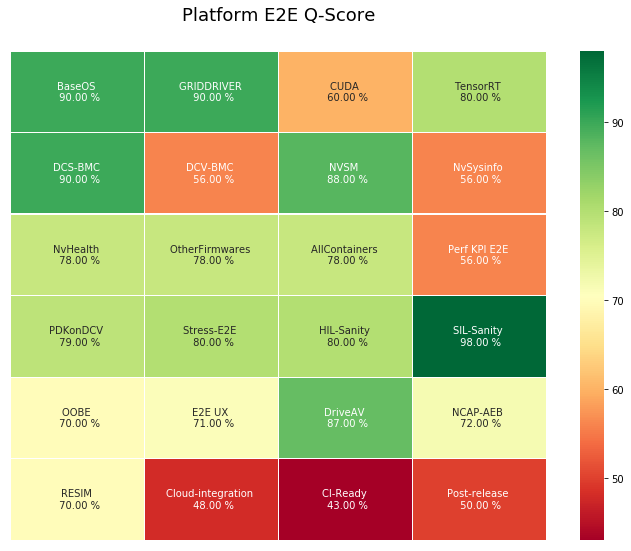

In [10]:
plt.figure(figsize=(12, 9))
ax=sns.heatmap(heatmap1_data,annot=labels,fmt='',cmap='RdYlGn',linewidths=0.30,annot_kws={"size": 10},yticklabels=False,xticklabels=False)
#sns.heatmap(result,annot=labels,fmt='',cmap='RdYlGn',linewidths=0.50,ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
title = "Platform E2E Q-Score"
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position ([0.5,1.05])
for t in ax.texts: t.set_text(t.get_text() + " %")
    
plt.show()
fig = ax.get_figure()
fig.savefig('heatmap.pdf')


In [11]:
# # import folium package 

import folium 

  

my_map = folium.Map(location = [18.5111226, 73.4099794], 

                                        zoom_start = 12) 

  

folium.Marker([18.516726, 73.856255], 

              popup = 'Pune').add_to(my_map) 

  

folium.Marker([13.067439, 80.237617], 

              popup = 'Chennai').add_to(my_map) 

  
# Add a line to the map by using line method . 
# it connect both coordiates by the line 
# line_opacity implies intensity of the line 

  

folium.PolyLine(locations = [(18.516726, 73.856255), (13.067439, 80.237617)], 

                line_opacity = 0.5).add_to(my_map) 

  

my_map.save("my_map.html") 